<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/Tree-Algorithm/machine_learning_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**결정 트리**
===
결정트리, 가지치기, 특성중요도
---

In [ ]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/와인/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
!pip install rich
!python -m rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                                 Rich features                                  
                                                                                
    Colors    ✓ 4-bit color                 ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ 
              ✓ 8-bit color                 ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ 
              ✓ Truecolor (16.7 million)    ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ 
              ✓ Dumb terminals              ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ 
              ✓ Automatic color conversion  ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ 
                                                                                
    Styles    All ansi styles: bold, dim, italic, underline, strikethrough,     
              reverse, and even blink.                                          
                                                                                
     Text 

- 폰트 스타일을 변경하기 위한 Rich 라이브버리 설치

## pandas - info() 메서드
- 데이터프레임의 각 열의 데이터 타입 확인

- 누락된 데이터가 있는지 확인하는데 유용


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


- 총 6,497 개의 sample
- 4개 열 모두 실숫값(float64)
- Non-Null Count: 6,497 (누락된 값 없음)

### <font color= #79DAE8>Q. 누락된 값이 있는 경우는 어떻게?</font>
### <font color= #F06E5E>A. 데이터를 버리거나 or 평균값으로 채우거나 </font>

## pandas - describe() 메서드
- 통계 출력: 평균, 표준편차, 최소, 최대, 중간, 1사분위수, 3사분위수

In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


|<h1>Command</h1>|<h1>Description</h1>|
|:-------|:-----------| 
|<h3>`mean`|<h5>평균|
|<h3>`std`|<h5>표준편차|
|<h3>`min`|<h5>최소|
|<h3>`25%`|<h5>1사분위수|  
|<h3>`50%`|<h5>중간값|
|<h3>`75%`|<h5>2사분위수|
|<h3>`max`|<h5>최대|

### 1. 데이터 프레임을 numpy 배열로 변경

In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

### 2. 훈련 세트와 테스트 세트로 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split( 
    data, target, test_size=0.2, random_state=42
)

# 훈련 세트 전처리
- StandardScaler 클래스 사용하여 특성 **표준화**

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

1. 훈련 세트 전처리
2. 같은 객체를 그대로 사용해 테스트 세트도 변환

# 로지스틱 회귀 모델 훈련

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


- 점수가 높지 않음  
- 둘 다 낮으니 모델이 다소 **과소적합**

##해결방안👉
1. 규제 매개변수 C값 변경
2. solver 매개변수에서 다른 알고리즘 선택
3. 다항 특성을 만들어 추가



# 현재 결과 보고

In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 로지스틱 회귀가 학습한 계수와 절편

# 결정 트리(Decision Tree)
- <font color= #FF0000>이유를 설명하기 쉬운 모델</font>
- <font color= #F9D923>스무고개</font>와 유사
- 질문을 하나씩 던져서 정답과 맞춰가는 과정
- 데이터를 잘 나눌 수 있는 질문을 찾으면 계속 질문 추가해서 정확도 높임
- 사용법은 (fit, score, predict)와 동일

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)

print('train score: ', dt.score(train_scaled, train_target))
print('test score: ', dt.score(test_scaled, test_target))

train score:  0.996921300750433
test score:  0.8592307692307692


- random_state는 결과가 동일하게 만드는 매개변수. 실제로는 필요 X
- 훈련 세트 점수 매우 높고, 테스트 성능은 조금 낮음 → **과대적합**

# 결정 트리 시각화

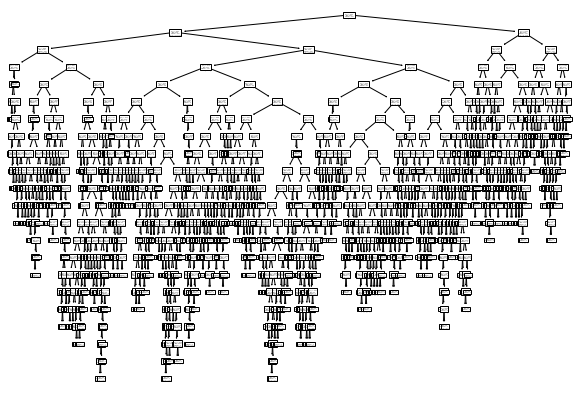

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 위에서부터 아래로 거꾸로 자라나는 나무 모양
- <font color= #F9D923>루트 노드(root node)</font>: 맨 위 의 노드  
- <font color= #F9D923>리프 노드(leaf node)</font>: 맨 아래 노드
- <font color=#F9D923>노드</font>: 훈련 데이터의 특성에 대한 테스트 표현
ex) 현재 샘플의 당도가 -0.239보다 작거나 같은지 테스트
- 가지(branch): 테스트의 결과(True,False)
  - 일반적으로 하나의 노드는 2개의 가지 가짐
- 너무 복잡하니 트리의 깊이 제한해서 출력
- <font color=#F9D923>max_depth</font> 매개변수: 루트 노드를 제외한 트리 깊이 지정
- <font color=#F9D923>filled</font> 매개변수: 클래스에 맞게 노드 색 변경
- <font color=#F9D923>featured_names</font> 매개변수: 특성 이름 전달
- 노드가 어떤 특성으로 나뉘는지 좀 더 쉽게 이해 가능

# 결정 트리 시각화

매개변수 지정

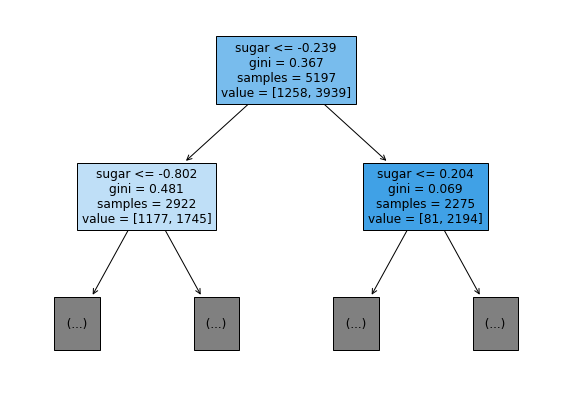

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names=['alcohol','sugar','pH'])
plt.show()

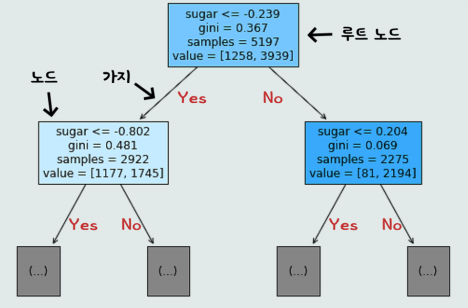


# 결정 트리 설명

루트 노드는 당도가 -0.239 이하인지 질문   
  → <font color=#F9D923>Yes</font>이면 왼쪽 가지 / <font color=#F9D923>No</font>는 오른쪽 가지


기본형식:


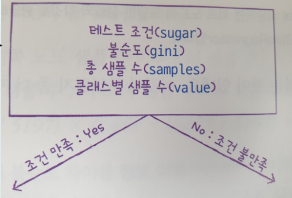


---

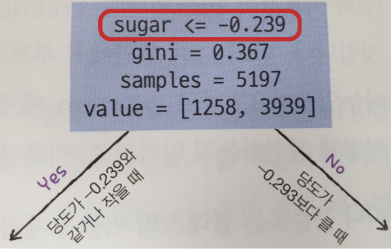

> [samples]
- 루트 노드의 총 샘플 수: 5,187개

> [values]
- 음성 클래스(레드와인) 1,258개
- 양성 클래스(화이트와인) 3,989개

> [gini]
- 불순도: 뒤에서 자세히




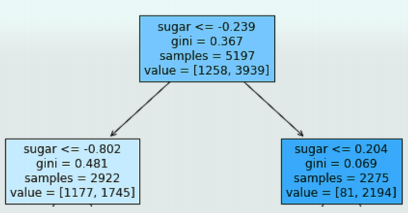

# 결정 트리 설명 - 왼쪽 노드

- <font color=#F9D923>당도가</font> 더 낮은지 질문(-0.802)
- 음성 1,177 / 양성 1,745
- 루트 노드보다 양성 클래스(화이트 와인)
비율이 크게 줄어들었음




# 결정 트리 설명 - 오른쪽 노드

- 음성 클래스 81, 양성 클래스가 2,194
- <font color=#F9D923>대부분의 화이트 와인</font> 샘플이 이 노드로 이동 
- 노드의 바탕 색깔 확인
- 루트 노드보다 이 노드가 더 진하고, 왼쪽 노드는 더 연함
- <font color=#F9D923>filled = True</font> 지정하면 <font color=#ff0000>클래스마다</font> 색깔 부여
  + 어떤 클래스의 비율이 높아지면 <font color=#ff0000>점점 진한색</font>으로 표시

# 결정 트리에서의 예측
- 리프 노드에서 <font color=#F9D923>가장 많은 클래스 → 예측 클래스
- 만약 오른쪽 결정 트리의 성장을 여기서 멈춘다면 왼쪽 / 오른쪽 노드 모두 양성 클래스로 예측됨

- <font color=#F9D923>두 노드 모두 양성 클래스의 개수가 많이 때문</font>

# 지니 불순도(Gini impurity)
gini: <font color=#F9D923>DecisionTreeClassifier</font> 클래스의 <font color=#F9D923>criterion</font> 매개변수의 기본값

criterion 매개변수
- 루트 노드는 어떻게 당도 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나눴을까?
- 바로 criterion 매개변수에 지정한 지니 불순도를 사용
- 즉, 지니 불순도란 <font color=#F9D923>노드에서 데이터를 분할할 기준</font>을 정하는 변수

지니 불순도 = 1 - (음성 클래스 비율² + 양성 클래스 비율²)
  Ex) 루트노드 계산
  = 1 - ((1258 / 5197)² + (3939/5197)²) = 0.367

노드의 두 클래스의 비율이 정확히 1/2 → 불순도 0.5 → <font color=#ff0000>최악</font>

노드에 하나의 클래스만 있다 → 불순도 0 → <font color=#F9D923>순수 노드</font>

> 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 <font color=#ff0000>가능한 크도록 트리를 성장</font>시킴!

# 정보이득(information gain)
부모 노드와 자식 노드의 <font color=#F9D923>불순도 차이 계산</font>
  1. 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더함
  2. 더한 결과를 부모 노드의 불순도에서 뺌

부모의 불순도 - (왼쪽 수 / 부모 수) x 왼쪽 불순도
  - (오른쪽 수 / 부모 수) x 오른쪽 불순도

Ex) 왼쪽 2,922개, 오른쪽 2,275개 샘플 이동
> 0.367 - (2922/5197) x 0.481 - (2275/5197) x 0.069 = 0.066

지니 불순도를 기준으로 <font color=#F9D923>정보 이득이 최대</font>가 되도록 데이터 분리

# 결정 트리 알고리즘

1. 불순도 기준을 사용해 <font color=#F9D923>정보 이득이 최대</font>가 되도록 노드 분할
2. 새로운 샘플에 대해 예측할 때 <font color=#F9D923>노드의 질문</font>에 따라 트리 이동
3. 마지막에 도달한 노드의 <font color=#F9D923>클래스 비율</font>을 보고 예측

> 최초 생성 모델은 우칙과 같이 <font color=#ff0000>제한없이</font> 자라났기 때문에 훈련 세트보다 테스트 세트에서 점수가 크게 낮았음
해결 → <font color=#ff0000>가지치기</font>

# 가지치기
- 열매를 잘 맺기 위해 과수원에서는 가지치기를 함
- 결정 트리도 <font color= #0080ff>가지치기</font> 필요!
- 그렇지 않으면 끝까지 자라나는 트리 생성
- 훈련 세트에는 아주 잘 맞겠지만 테스트 세트에서 점수는 그에 못 미침
- 과대적합 → <font color=#ff0000>일반화가 잘 안 됨</font>

- 결정 트리에서 가지치기를 하는 가장 간단한 방법: <font color=#F9D923>트리의 최대 깊이</font> 지정
- <font color=#F9D923>max_depth</font> 매개변수: 루트 노드 아래로 최대 n개의 노드까지만 성장


In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


> 훈련 세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로인 모습

# 시각화


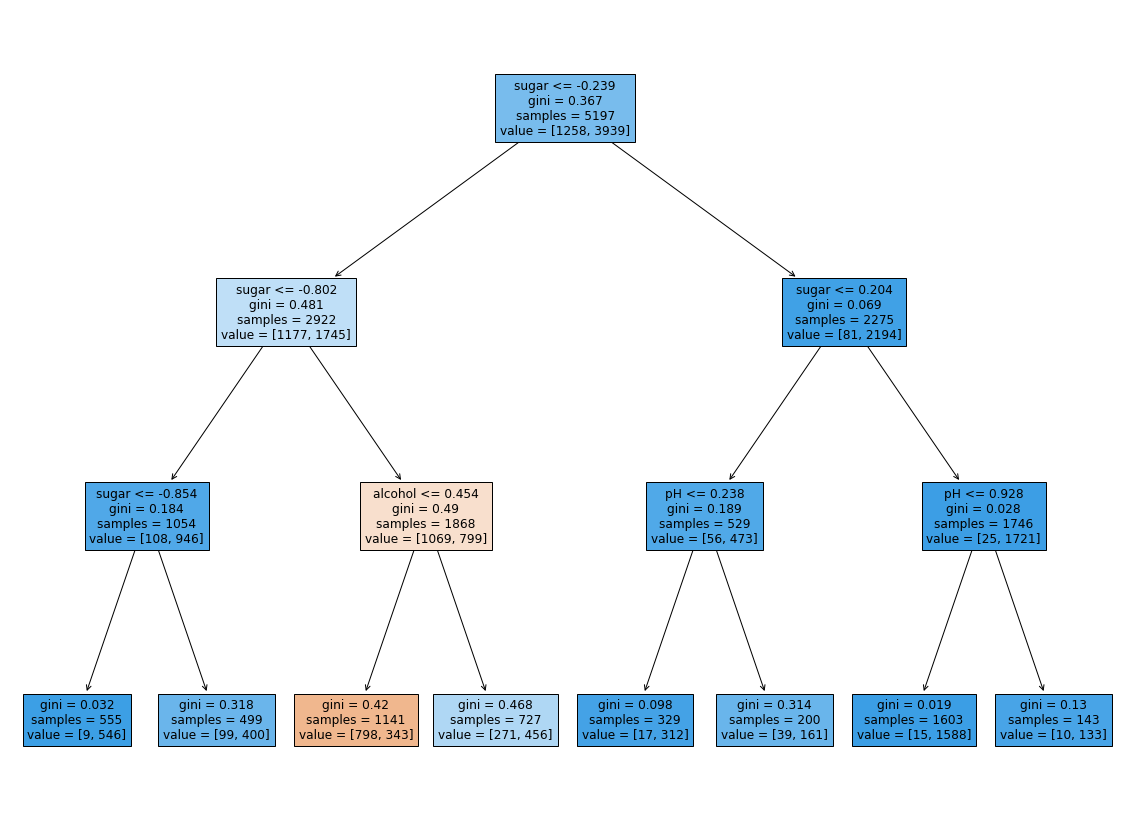

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

- 깊이 1: 모두 당도(sugar) 기준
- 깊이 2: 맨 왼쪽 노드만 당도 기준
  - 왼쪽 2번째: 알코올 도수 기준
  - 나머지: pH 기준
- 깊이 3: 최종 노드인 리프 노드 왼쪽에서 세 번째 노드만 <font color=#FF0000>음성 클래스</font>가 더 많음(<font color=#c53a3a>레드와인</font>)

> 당도는 -0.239보다 작고 -0.802보다 크면서, 알코올 도수는 0.454보다 작아야 레드와인



# 결정 트리
- 불순도를 기준으로 샘플을 나눔 👉 불순도는 클래스별 비율 가지고 계산
- 특성값의 스케일은 결정 트리 알고리즘 계산에 <font color=#FF0000>아무런 영향을 미치지 않음</font>
- <font color=#FF0000>표준화 전처리를 할 필요가 없음</font> (매우 큰 장점)

# 전처리 없이 다시 훈련
- 결정 트리는 표준화 전처리 과정이 필요 없음
- <font color=#F9D923>전처리하기 전</font>의 훈련세트(train_input)와 테스트 세트(test_input)로 졀정 트리 모델을 다시 훈련한다.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


> 전처리 전과 전처리 후의 결과가 정확히 <font color=#FF0000>동일</font>하다!

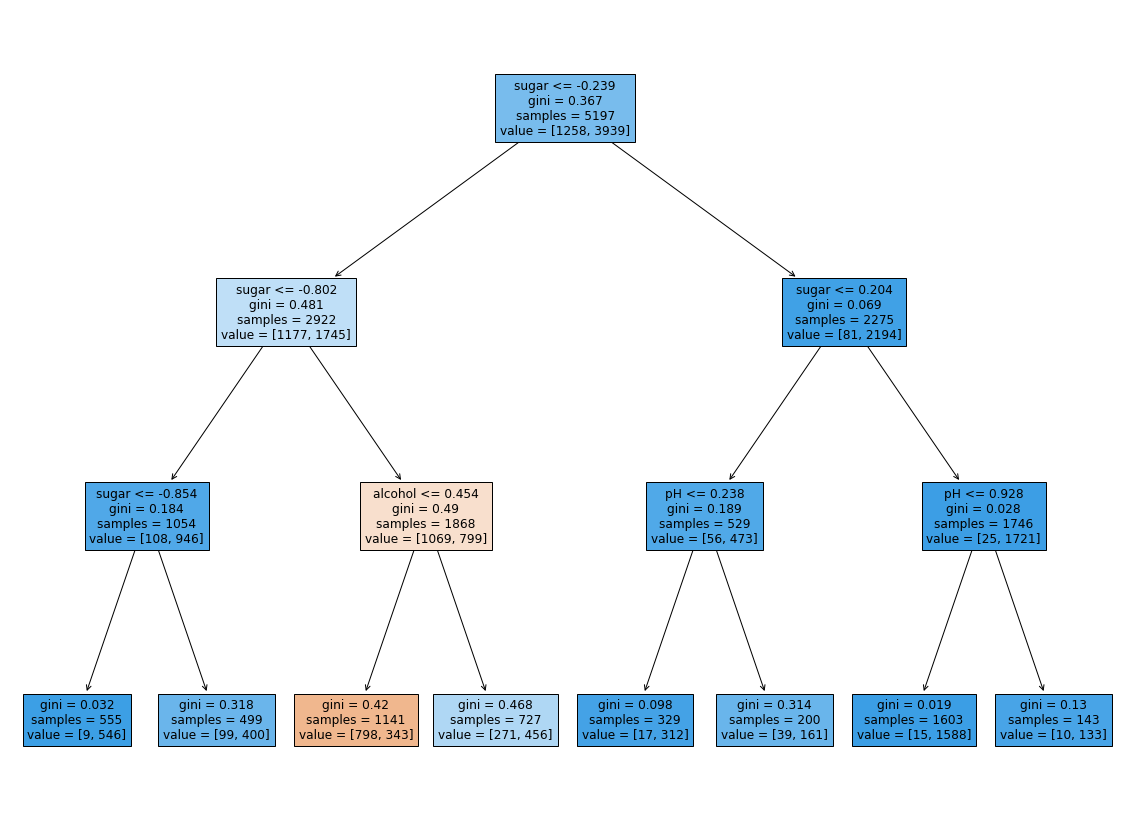

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

- 당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025와 같거나 작으면 <font color=#c53a3a>레드 와인</font>
- 그 외는 모두 <font color=#e6f5a0>화이트 와인</font>으로 예측


# 특성 중요도
- 특성 중요도: 어떤 특성이 가장 중요한지 알려줌
- 이 트리는 루트 노드와 깊이 1에서 당도를 사용했기 때문에 아마 당도가 가장 유용한 특성 중 하나일 것 같음

<font color=#F9D923>feature_importances_ 속성에 저장되어 있음</font>
```print(dt.feature_importances_)```



In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


> 역시 두 번째 특성인 당도가 0.87 정도로 특성 중요도가 가장 높음

> 세 값을 모두 더하면 1


> 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산

좌우가 균일하지 않은 트리
===
- max_depth 매개변수로 가지치기 👉 <font color=#F9D923>좌우가 대칭</font>인 트리 생성
- <font color=#F9D923>min_impurity_decease </font> 매개변수로 가지치기 가능
- 어떤 노드의 정보 이득 ❌(노드 샘플 수) / (전체 샘플 수) 값이 해당 매개변수보다 작으면 더 이상 분할하지 않음
  - → 좌우가 대칭이 되지 않을 가능성이 매우 높음

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8874350586877044
0.8615384615384616


<h3><font color=#FF0000>테스트 세트의 성능이 높아졌음!</font></h3>

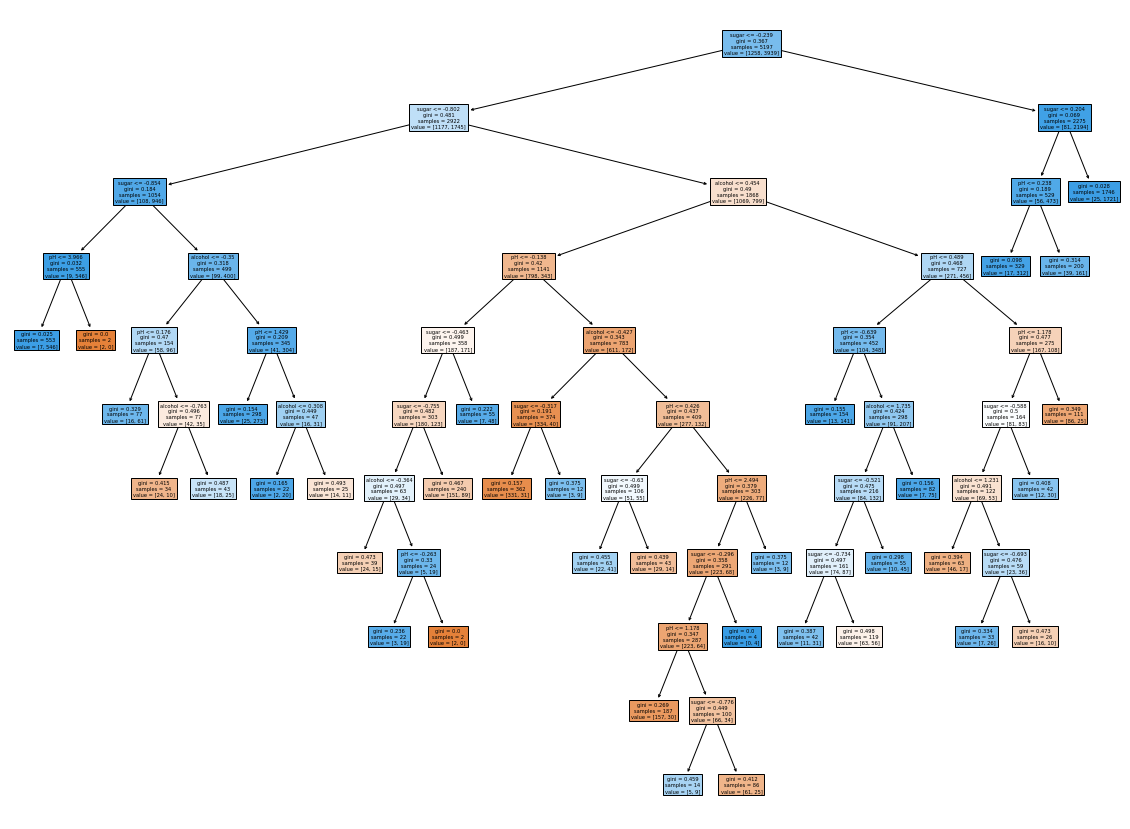

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()